Exemplo usando uma árvore de decisão, que é um tipo de algoritmo que realiza seleção de atributos embutida:

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df
y = data.target

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar uma árvore de decisão
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

<Figure size 800x600 with 0 Axes>

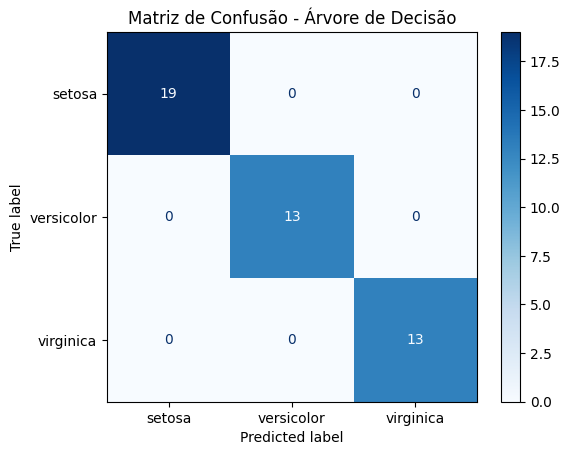

In [3]:
# Fazer previsões no conjunto de teste
y_pred = dtree.predict(X_test)

# Exibir a matriz de confusão como um gráfico
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test, display_labels=data.target_names, cmap='Blues')
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

In [4]:
# Gerar e imprimir um relatório detalhado de classificação
print(f"Relatório de Classificação:\n{classification_report(y_test, y_pred, target_names=data.target_names)}")

# Exibir a importância dos atributos
feature_importances = pd.Series(dtree.feature_importances_, index=data.feature_names).sort_values(ascending=False)
print(f"Importância dos Atributos:\n{feature_importances}")

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Importância dos Atributos:
petal length (cm)    0.893264
petal width (cm)     0.087626
sepal width (cm)     0.019110
sepal length (cm)    0.000000
dtype: float64


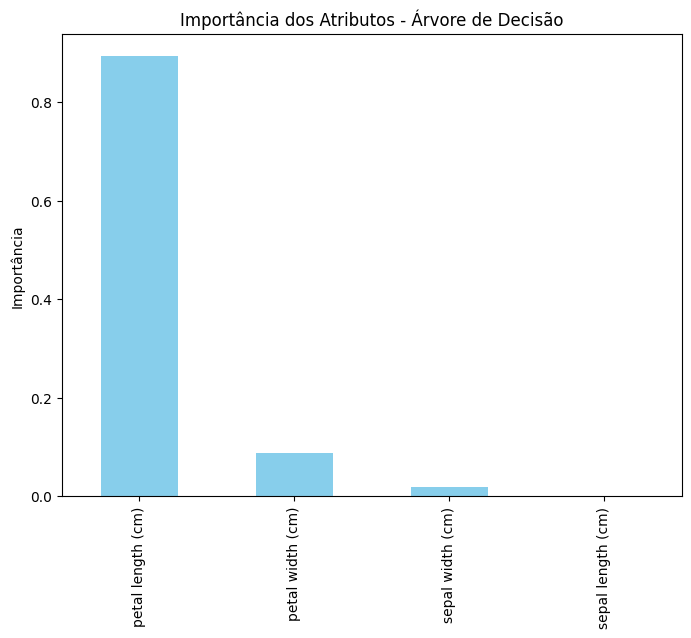

In [5]:
# Plotar a importância dos atributos
plt.figure(figsize=(8, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Importância dos Atributos - Árvore de Decisão")
plt.ylabel("Importância")
plt.show()
